In [32]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
combined_data = city_data.merge(ride_data, on = "city")

# Display the data table for preview
combined_data.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [33]:
#separated dfs for city categories
rural_df = combined_data[combined_data['type'] == 'Rural']
suburban_df = combined_data[combined_data['type'] == 'Suburban']
urban_df = combined_data[combined_data['type'] == 'Urban']

In [34]:
combined_data.columns

Index(['city', 'driver_count', 'type', 'date', 'fare', 'ride_id'], dtype='object')

In [35]:
# create a variable holding average fare by city, driver count and total rides per city
average_fare_by_city_urban = urban_df.groupby(["city"]).mean()['fare']
average_fare_by_driver_count_urban = urban_df.groupby(["city"]).mean()['driver_count']
total_fare_by_ride_id_urban = urban_df.groupby(["city"]).count()['ride_id']

average_fare_by_city_suburban = suburban_df.groupby(["city"]).mean()['fare']
average_fare_by_driver_count_suburban = suburban_df.groupby(["city"]).mean()['driver_count']
total_fare_by_ride_id_suburban = suburban_df.groupby(["city"]).count()['ride_id']

average_fare_by_city_rural = rural_df.groupby(["city"]).mean()['fare']
average_fare_by_driver_count_rural = rural_df.groupby(["city"]).mean()['driver_count']
total_fare_by_ride_id_rural = rural_df.groupby(["city"]).count()['ride_id']


## Bubble Plot of Ride Sharing Data

Text(45, 40, 'Note goes here')

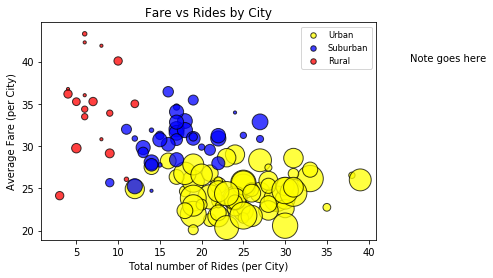

In [52]:


# three scatter plots for each city type
plt.scatter(total_fare_by_ride_id_urban, 
            average_fare_by_city_urban, 
            s = average_fare_by_driver_count_urban*10, 
            color = "yellow", edgecolor = 'black', 
            label = 'Urban', alpha = .75)

plt.scatter(total_fare_by_ride_id_suburban, 
            average_fare_by_city_suburban, 
            s = average_fare_by_driver_count_suburban*10, 
            color = "blue", edgecolor = 'black', 
            label = 'Suburban', alpha = .75)

plt.scatter(total_fare_by_ride_id_rural, 
            average_fare_by_city_rural, 
            s = average_fare_by_driver_count_rural*10, 
            color = "red", edgecolor = 'black', 
            label = 'Rural', alpha = .75)



# #print scatter plot
plt.title('Fare vs Rides by City')
plt.xlabel('Total number of Rides (per City)')
plt.ylabel('Average Fare (per City)')


lgnd = plt.legend(fontsize = "small", mode = "Expanded", numpoints = 1, scatterpoints = 1, labelspacing = 0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]


plt.text(45,40, "Note goes here")



## Total Fares by City Type

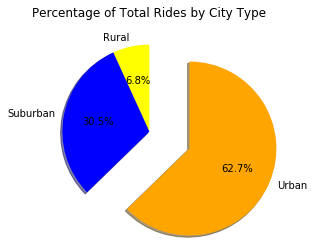

In [39]:
# Calculate Type Percents
type_data = combined_data.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

fare_sum = type_data.sum()['fare']
labels = fare_sum.index

# Build Pie Chart
colors = ["yellow","blue","orange"]
explode = [0,0,.5]

plt.pie(fare_sum, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, startangle = 90)
plt.title('Percentage of Total Rides by City Type')

# Save Figure
plt.show()

## Total Rides by City Type

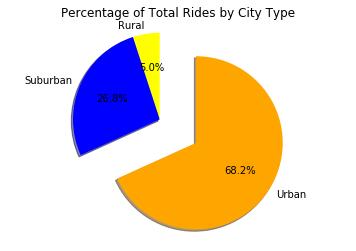

<function matplotlib.pyplot.savefig(*args, **kwargs)>

In [40]:
# Calculate Ride Percents
#fare_sum = type_data.sum()['fare']



ride_sum = type_data.sum()['ride_id']
colors = ["yellow","blue","orange"]
labels = ride_sum.index


# Build Pie Chart
 

plt.pie(ride_sum, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, startangle = 90)
plt.title('Percentage of Total Rides by City Type')

plt.axis('equal')
plt.show()

# Save Figure
plt.savefig


In [41]:
# Show Figure
plt.show()

## Total Drivers by City Type

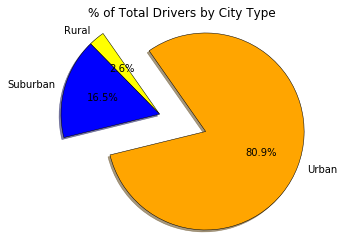

In [43]:
# Calculate Driver Percents
ride_sum = combined_data.count()['ride_id']

# of driver per city type

driver_sum = city_data.groupby('type').sum()['driver_count']

labels = driver_sum.index
plt.pie(driver_sum, startangle = 125, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()

In [ ]:
# Show Figure
plt.show()